In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160.0,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130.0,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138.0,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150.0,195,0,Normal,122,N,0.0,Up,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       909 non-null    float64
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      914 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 86.2+ KB


In [3]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         9
Cholesterol       0
FastingBS         0
RestingECG        4
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

 There is 4 missing value in RestingECG and 9 missing value in RestingBS. So I'll impute it with mode.

In [7]:

df['RestingBP'].fillna(df['RestingBP'].mode()[0], inplace=True)
df['RestingECG'].fillna(df['RestingECG'].mode()[0], inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_35544\3117435710.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RestingBP'].fillna(df['RestingBP'].mode()[0], inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_35544\3117435710.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a c

In [8]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Now there's is no missing values in the data.

In [9]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.298475,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.483870,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


### Here we can see, 
- *Age:*
Patients are between 28 and 77 years old, with an average age of about 53.5.

- *RestingBP:*
Most readings range from 120 to 140 mm Hg, but one record has a value of 0, which may be an error.

- *Cholesterol:*
Average cholesterol is around 199 mg/dl, but some patients have 0, which is unrealistic and might need review. Values range widely up to 603 mg/dl.

- *FastingBS:*
Only about 23% of patients have high fasting blood sugar (mean = 0.23), most have 0 (normal).

- *MaxHR (Maximum Heart Rate):*
The average is about 137 bpm, ranging from 60 to 202 bpm.

- *Oldpeak (ST Depression):*
Values range from -2.6 to 6.2, with an average of 0.89, indicating variability in ECG results during exercise.But minimum value of -2.6 for Oldpeak is not normal and is very likely an error or noise in the data. 

- *HeartDisease (Target Variable):*
About 55% of the patients have heart disease (1), and 45% do not (0).

In [10]:
print(df[df['RestingBP'] == 0])


     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
449   55   M           NAP        0.0            0          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
449    155              N      1.5     Flat             1  


In [11]:
df.loc[df['RestingBP'] == 0, 'RestingBP'] = np.nan
df['RestingBP'].fillna(df['RestingBP'].median(), inplace=True)


C:\Users\DELL\AppData\Local\Temp\ipykernel_35544\3186430418.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RestingBP'].fillna(df['RestingBP'].median(), inplace=True)


In [16]:
df.loc[df['Cholesterol'] == 0, 'Cholesterol'] = np.nan
df['Cholesterol'].fillna(df['Cholesterol'].median(), inplace=True)


C:\Users\DELL\AppData\Local\Temp\ipykernel_35544\1709943439.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cholesterol'].fillna(df['Cholesterol'].median(), inplace=True)


In [17]:
df.loc[df['Cholesterol'] == 0, 'Cholesterol'] = np.nan
df['Cholesterol'].fillna(df['Cholesterol'].median(), inplace=True)


C:\Users\DELL\AppData\Local\Temp\ipykernel_35544\1709943439.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cholesterol'].fillna(df['Cholesterol'].median(), inplace=True)


In [ ]:
# imputing Oldpeak values which are less than 0 with median.
df.loc[df['Oldpeak'] < 0, 'Oldpeak'] = np.nan
df['Oldpeak'].fillna(df['Oldpeak'].median(), inplace=True)


C:\Users\DELL\AppData\Local\Temp\ipykernel_35544\3337007468.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Oldpeak'].fillna(df['Oldpeak'].median(), inplace=True)


In [18]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.440087,243.204793,0.233115,136.809368,0.909804,0.553377
std,9.432617,17.959733,53.401297,0.423046,25.460334,1.040160,0.497414
min,28.000000,80.000000,85.000000,0.000000,60.000000,0.000000,0.000000
25%,47.000000,120.000000,214.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,237.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


The dataset is now clean

1. Histogram for checking age distribution : 

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


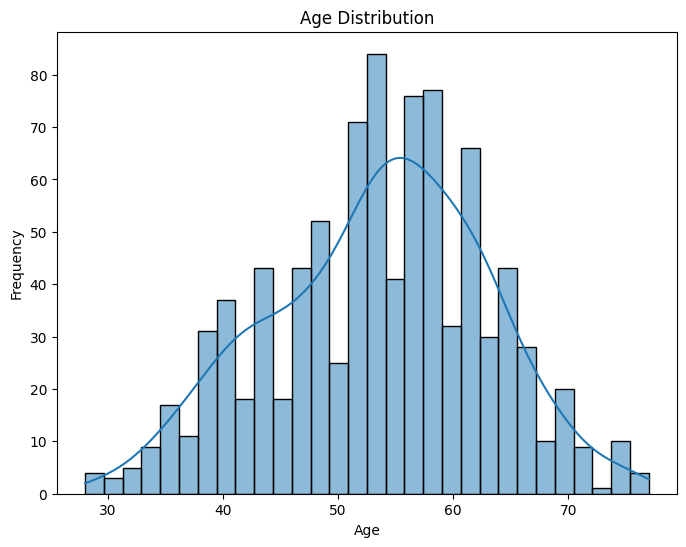

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


Most patients are aged between 50–60, forming a nearly normal distribution.

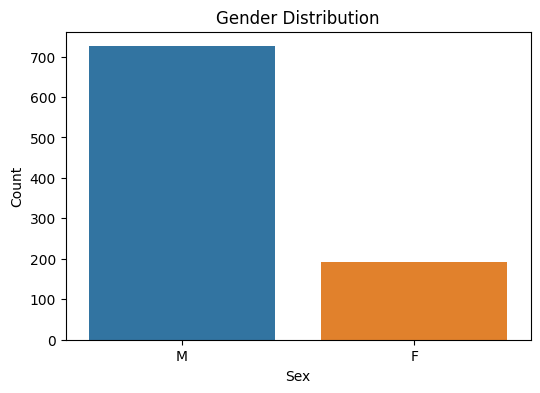

In [20]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', data=df)
plt.title('Gender Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()


The dataset is male-dominated, with more than 700 males and under 200 females. 

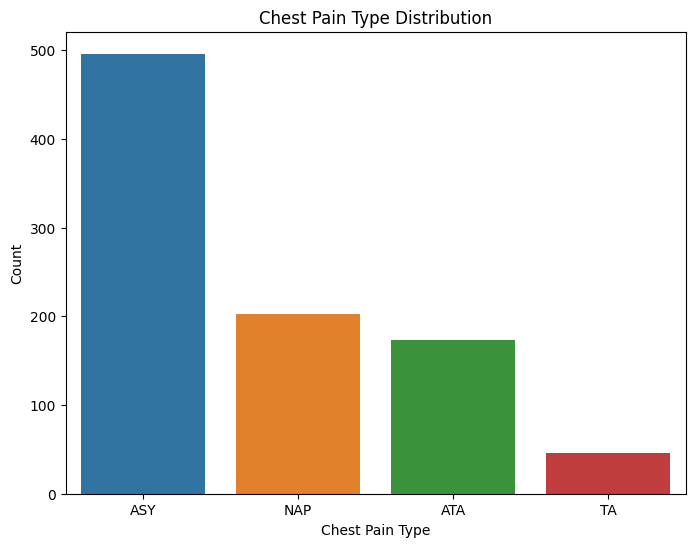

In [21]:
plt.figure(figsize=(8, 6))
sns.countplot(x='ChestPainType', data=df, order=df['ChestPainType'].value_counts().index)
plt.title('Chest Pain Type Distribution')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.show()


Asymptomatic (ASY) chest pain is most common, followed by NAP, ATA, and TA being rare.

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


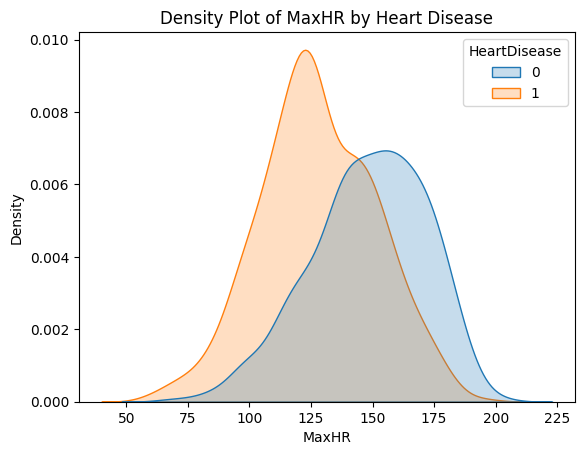

In [27]:
sns.kdeplot(data=df, x='MaxHR', hue='HeartDisease', fill=True)
plt.title("Density Plot of MaxHR by Heart Disease")
plt.show()

Patients without heart disease tend to have higher MaxHR, while those with heart disease have lower MaxHR peaks.

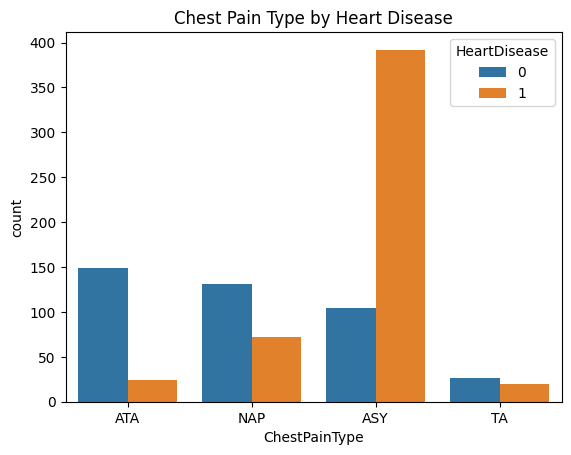

In [28]:
sns.countplot(x='ChestPainType', hue='HeartDisease', data=df)
plt.title("Chest Pain Type by Heart Disease")
plt.show()


Asymptomatic (ASY) chest pain is much more common in patients with heart disease, while ATA is dominant among healthy individuals.

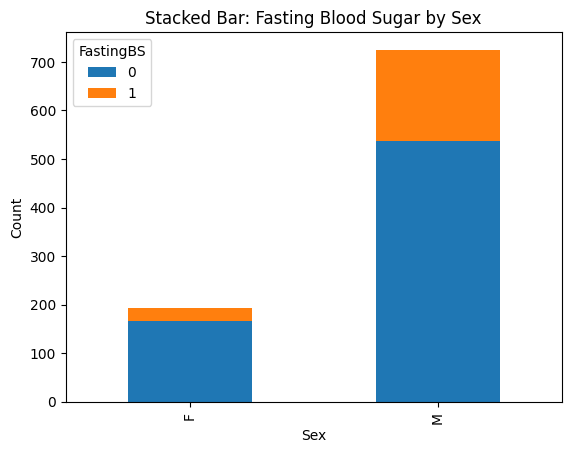

In [29]:
stacked_data = df.groupby(['Sex', 'FastingBS']).size().unstack()
stacked_data.plot(kind='bar', stacked=True)
plt.title("Stacked Bar: Fasting Blood Sugar by Sex")
plt.ylabel("Count")
plt.show()


Both males and females mostly have normal fasting blood sugar, but a higher number of males show elevated levels (>120 mg/dL).

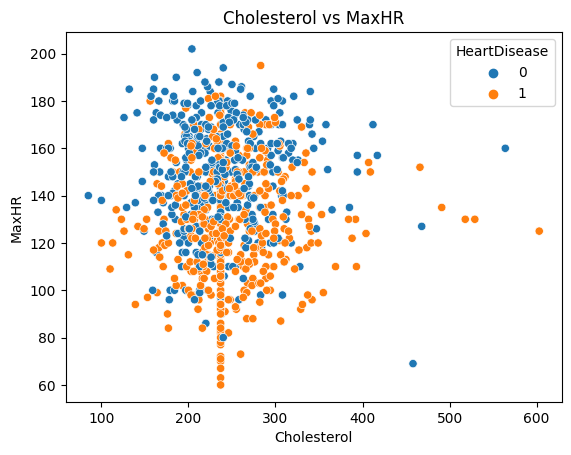

In [30]:
sns.scatterplot(x='Cholesterol', y='MaxHR', hue='HeartDisease', data=df)
plt.title("Cholesterol vs MaxHR")
plt.show()


There's no strong pattern, but most values are clustered around 200–250 cholesterol and 120–160 MaxHR

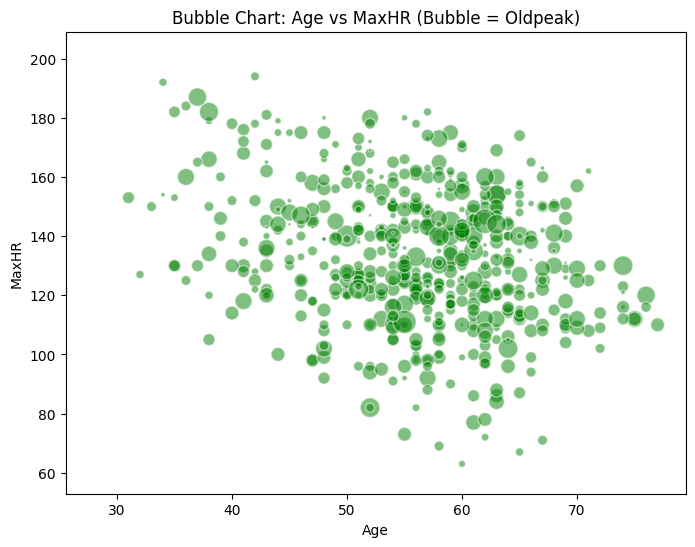

In [31]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['MaxHR'], s=df['Oldpeak']*50, alpha=0.5, c='green', edgecolors='w')
plt.title("Bubble Chart: Age vs MaxHR (Bubble = Oldpeak)")
plt.xlabel("Age")
plt.ylabel("MaxHR")
plt.show()


Older patients generally achieve lower MaxHR, and larger bubbles (Oldpeak) suggest more heart strain during exercise in this group.

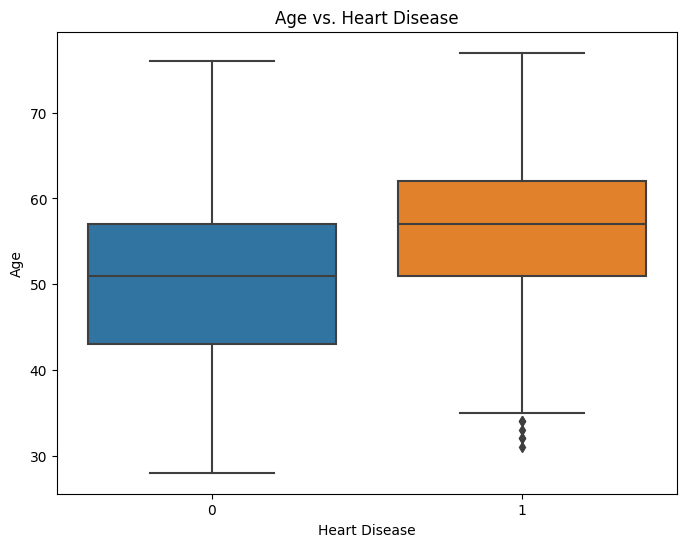

In [22]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='HeartDisease', y='Age', data=df)
plt.title('Age vs. Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Age')
plt.show()


Patients with heart disease tend to be older, mostly in the 55–65 age range.

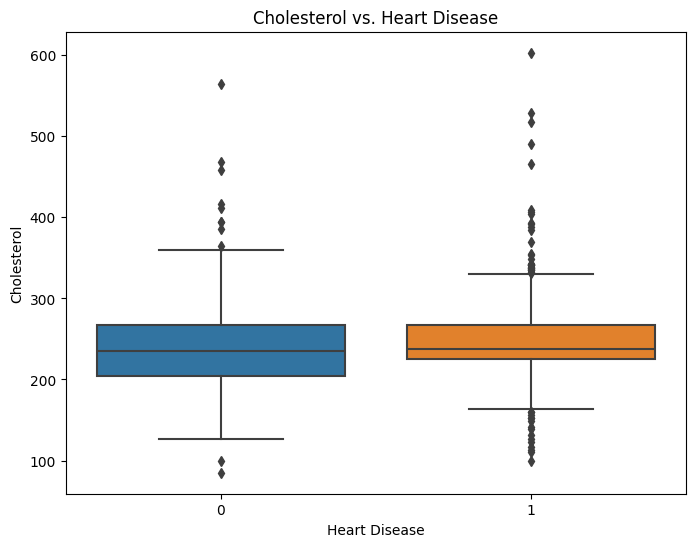

In [23]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='HeartDisease', y='Cholesterol', data=df)
plt.title('Cholesterol vs. Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Cholesterol')
plt.show()


Cholesterol levels are slightly higher and more varied among heart disease patients, with visible outliers.

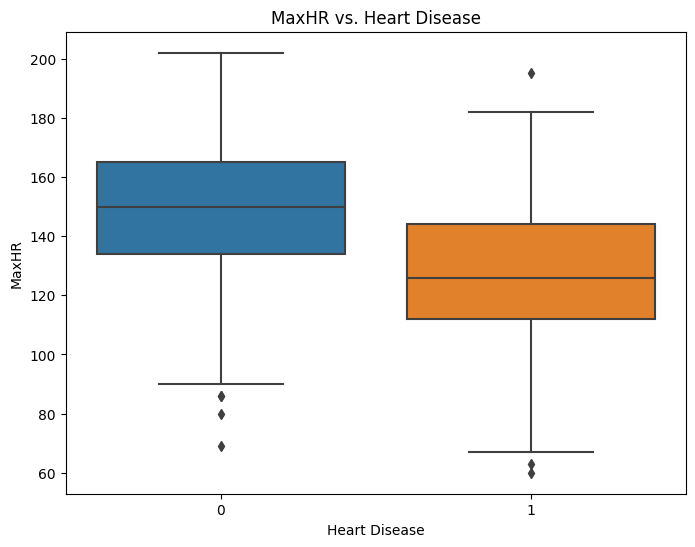

In [24]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='HeartDisease', y='MaxHR', data=df)
plt.title('MaxHR vs. Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('MaxHR')
plt.show()


Heart disease patients have lower maximum heart rates compared to those without the condition.

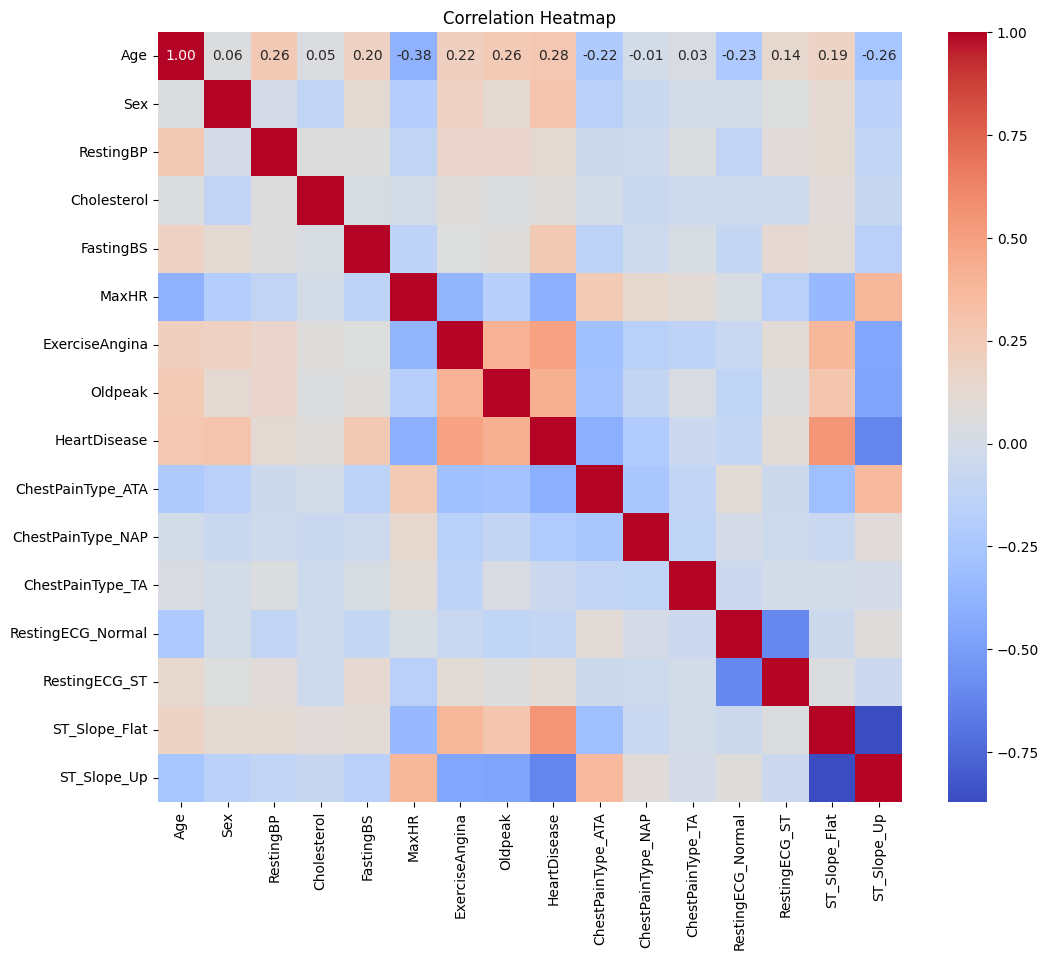

In [25]:
# Encoding categorical variables
df_encoded = df.copy()
df_encoded['Sex'] = df_encoded['Sex'].map({'M': 1, 'F': 0})
df_encoded['ExerciseAngina'] = df_encoded['ExerciseAngina'].map({'Y': 1, 'N': 0})
df_encoded = pd.get_dummies(df_encoded, columns=['ChestPainType', 'RestingECG', 'ST_Slope'], drop_first=True)

# Correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df_encoded.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


Oldpeak, MaxHR, and ST_Slope_Flat show stronger correlations with heart disease. Most other variables have weak relationships.